# CSE204 Project, Reinforcement learning with Flappy Bird

<img src="https://raw.githubusercontent.com/adimajo/polytechnique-cse204-2019-releases/master/logo.jpg" style="float: left; width: 20%" />



### Guruprerana Shabadi & Luca Bonengel, BX22

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In this project, we studied two different machine learning algorithms to learn how to play the (in)famous game Flappy Bird, **Neuroevolution** and **Q-Learning**.

**Neuroevolution** is a machine learning technique that applies evolutionary algorithms to construct artificial neural networks, taking inspiration from the evolution of biological nervous systems in nature.

**Q-learning** is a model-free reinforcement learning algorithm to learn the value of an action in a particular state.

# I. The game of Flappy Bird

The (in)famous game of flappy consists in controlling a bird and attempting to fly between columns of green pipes without hitting them.

<img src="img/fp.png" width="400">


At each state, the bird can take two actions, either jump or do nothing and continue to fall.

# II. Neuroevolution

The **Neuroevolution** algorithm consists in generations of birds associated to neural networks that learn how to play the game of Flappy Bird. In each generation, $50$ birds are generated. The inputs of the neural network are the $y$ position of the bird and the $y$ position of the next obstacle. In each frame, the output of the algorithm is computed. The output is a value between $0$ and $1$. Between each layer, the activation function used is the sigmoid function.

For the first generation of birds. The weights of their neural networks are computed uniformly between $-1$ and $1$. For the next generation of birds, the weights of the their neural networks can be computed in different ways. 
- Firstly, the neural networks of the birds that had the best scores are kept for the next generation. 
- Secondly, some birds can be generated by slightly changing some weights of the neural network of a bird achieving a good score. These changes in the weights of a neural network are called mutations.
- Thirdly, some birds are generated by breeding. This means the neural network of a new bird will be created by mixing the neural networks of a pair of parents. We can also add mutations.
- Finally, we can also add new randomly generated networks.

When we create mutations in a neural network, two paramters need to be defined:
- The mutation rate (`mutationRate` in our code).
- The impact of a mutation, i.e., by how much do we change the weight (`mutationRange` in our code). For instance, if `mutationRange`, we add a random number between $-1$ and $1$ to the weight that we mutate.

To begin with, let us study what is the best `mutationRate` we should take for our neuroevolution algorithm. Let us take the example where we construct the next generation of birds by taking the $20$% best birds of the previous generation (`elitism`) (by "best birds", we mean the birds that reached the highest scores). $20$% of the birds are genrated completely randomly (`randomBehaviour`) and the last $60$% birds are generated by breeding. Hence, these birds are created by mixing the neural networks of a pair of good performing parents and mutating some of their weights. As a result, we only mutate the birds generated by breeding. The parameters of our neuroevolution algorithm are the following and we study the case where `alpha` is set to $0.1, 0.3, 0.5, 0.7, 0.9$.

<img src="img/parameters.png" width="700">

In order to find the best possible `mutationRate`, we study the average number of generations needed to generate a bird that is capable of reaching a score of $100000$ (we take the average over 50 tests). Reaching a score of $100000$ corresponds approximately to playing the game for $30$ minutes without touching a single obstacle.

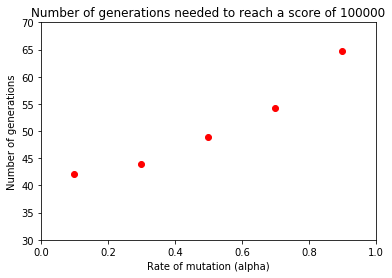

In [32]:
plt.plot([0.1, 0.3, 0.5, 0.7, 0.9], [42.16, 43.96, 48.9, 54.26, 64.78], 'ro')
plt.axis([0, 1, 30, 70])
plt.title("Number of generations needed to reach a score of 100000")
plt.xlabel("Rate of mutation (alpha)")
plt.ylabel("Number of generations")
plt.show()

As we can see above, the number of generations needed to reach a score of $100000$ increases with the mutation rate. As a result, we can deduce that birds performing well only need few mutations to perform even better.

As a side note, when we do not do any mutation (when `mutationRate = 0`), it takes a very big amount of generations to reach a score of $100000$ (about $2000$). Moreover, when we do not do any mutation and generate the next generation of birds only by using the networks of the best performing birds from the previous genereation (without creating totally new birds, i.e. `randomBehaviour = 0`), the algorithm seem to never be able to reach a score of $100000$. Hence, we can deduce that randomness is key to learn to play the game of Flappy for our Neuroevolution algorithm.

Now that we know that $0.1$ is a good mutation rate for our algorithm to perform well, let us study what should be the range of a mutation. To do so, let us the case where `beta` is set to $0.1, 0.3, 0.5, 0.7, 0.9$.

<img src="img/parameters_2.png" width="700">

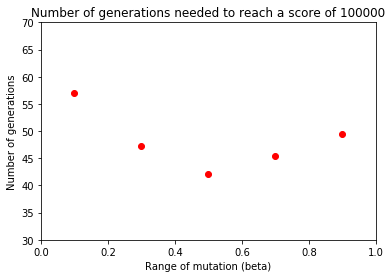

In [31]:
plt.plot([0.1, 0.3, 0.5, 0.7, 0.9], [57, 47.34, 42.16, 45.5, 49.42], 'ro')
plt.axis([0, 1, 30, 70])
plt.title('Number of generations needed to reach a score of 100000')
plt.xlabel('Range of mutation (beta)')
plt.ylabel('Number of generations')
plt.show()

As we can see in the graph above, $0.5$ seem to be a good choice for `mutationRange`.

From now on, let us fix `mutationRange = 0.5` and `mutationRate = 0.1`. Let us study other combinations of neural networks. Again, we want to know the number of generations needed to reach a score of $10000$. To begin with, let us study the performance when we vary the number of hidden layers. In the graph below, all hidden layers have 3 nodes.

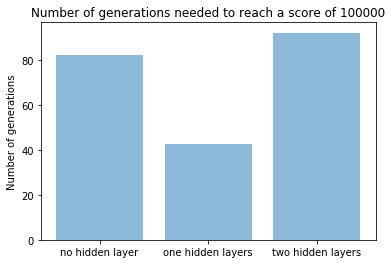

In [38]:
plt.bar(['no hidden layer', 'one hidden layers', 'two hidden layers'], [82.3, 42.6, 92.24], align='center', alpha=0.5)
plt.ylabel('Number of generations')
plt.title('Number of generations needed to reach a score of 100000')
plt.show()

As we can see above, one hidden layer seem to be the best option. Having more than one hidden layer is not a good idea since the problem we want to solve is not very complex. In fact, the inputs of the neural network are two numbers between $0$ and $1$ and in order for the bird to overcome an obstacle, we just need these two values to be approximately equal (i.e. the bird has to be at the same height as the obstacle). Having no hidden layer is not a good idea either since the problem is not linear. In that case, a score of $100000$ is reached simply thanks to the random values that are computed in each generations.

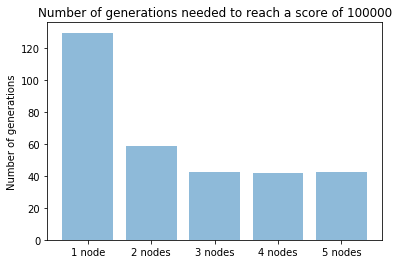

In [40]:
plt.bar(['1 node', '2 nodes', '3 nodes', '4 nodes', '5 nodes'], [129.74, 58.62, 42.6, 41.68, 42.72], align='center', alpha=0.5)
plt.ylabel('Number of generations')
plt.title('Number of generations needed to reach a score of 100000')
plt.show()

As we can see above, 3 hidden nodes seem to be the best option. In fact, $1$ or $2$ nodes in the hidden layer are not sufficient to deal with the non-linear problem.

# III. Q-Learning

**Q-learning** is a model-free reinforcement learning algorithm that seeks to find the best possible action to take given a specific state. More specifically, Q-learning seeks to learn a policy that maximizes the total reward. The Q-learning algorithm consists in building amatrix that follows the shape of `[state, action]`. In our case the state consists in a tuple `(y_bird, y_obstacle)` where `y_bird` is the `y` coordinate of the bird and `y_obstacle` is the `y` coordinate of the next obstacle that the bird has to overcome. For our Flappy Bird game, there are two possible actions, either jump or do nothing and continue to fall.



# IV. Comparison of the two algorithms
